#**1. Basic Data Loading and Data Preparation**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)


In [ ]:
!pip install textstat
!pip install emoji
!pip install lazypredict
!pip install chardet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import pandas as pd

# Load the Excel file
#df = pd.read_excel("/content/drive/MyDrive/Dravidian SMS Research/DS2.xlsx")  # Change "input.xlsx" to your file name

# Save as CSV
#df.to_csv("/content/drive/MyDrive/Dravidian SMS Research/DS2.csv", index=False)  # Saves without the index column


In [ ]:
data_raw = '/content/drive/MyDrive/Dravidian SMS Research/IIITD Precog.csv'

In [ ]:
import chardet

# Detect encoding
with open(data_raw, 'rb') as file:
    result = chardet.detect(file.read(10000))  # Read the first 10,000 bytes
    detected_encoding = result['encoding']


In [ ]:
# Read the CSV with the detected encoding
# Load dataset from a local file
#data = pd.read_csv(data_raw, sep='\t', names=['label', 'message'], header=None)

data=pd.read_csv(data_raw) ##, encoding=detected_encoding)

# Display the first few rows
print(data.head())


  label                                            message
0  spam  Luxurious 2/3 BHK lifestyle Apts at sec 137 No...
1  spam  Guinness Record!,World�s most pierced women! C...
2  spam  Jalebee or DK Bose?,Help break this tie. We ha...
3  spam  Test for Yuvraj,How many Test centuries has Yu...
4  spam  Harry Potter...,How is Harry Potter & the Pris...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    1999 non-null   object
 1   message  1999 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [ ]:
data.head()

,label,message
0,spam,Luxurious 2/3 BHK lifestyle Apts at sec 137 No...
1,spam,"Guinness Record!,World�s most pierced women! C..."
2,spam,"Jalebee or DK Bose?,Help break this tie. We ha..."
3,spam,"Test for Yuvraj,How many Test centuries has Yu..."
4,spam,"Harry Potter...,How is Harry Potter & the Pris..."


In [ ]:
df = data

In [ ]:
df.drop_duplicates()

,label,message
0,spam,Luxurious 2/3 BHK lifestyle Apts at sec 137 No...
1,spam,"Guinness Record!,World�s most pierced women! C..."
2,spam,"Jalebee or DK Bose?,Help break this tie. We ha..."
3,spam,"Test for Yuvraj,How many Test centuries has Yu..."
4,spam,"Harry Potter...,How is Harry Potter & the Pris..."
...,...,...
1994,ham,Husband: Mai tumhari roz ki farmaishon se tang...
1995,ham,HUSBAND WIFE se bola HATA Lo Apne Chehre Se Ye...
1996,ham,Husband To Wife-Tum Meri Zindagi HoOrWIFE-Or K...
1997,ham,HUSBAND to WIFE HATA Lo Apne Chehre Se Ye Zulf...


In [ ]:
df.describe().T

,count,unique,top,freq
label,1999,2,spam,1000
message,1999,1983,I got an email yesterday. You also probably re...,2


In [ ]:
df['label'].value_counts()

,count
label,
spam,1000
ham,999


In [ ]:
print(df['message'])

0       Luxurious 2/3 BHK lifestyle Apts at sec 137 No...
1       Guinness Record!,World�s most pierced women! C...
2       Jalebee or DK Bose?,Help break this tie. We ha...
3       Test for Yuvraj,How many Test centuries has Yu...
4       Harry Potter...,How is Harry Potter & the Pris...
                              ...                        
1994    Husband: Mai tumhari roz ki farmaishon se tang...
1995    HUSBAND WIFE se bola HATA Lo Apne Chehre Se Ye...
1996    Husband To Wife-Tum Meri Zindagi HoOrWIFE-Or K...
1997    HUSBAND to WIFE HATA Lo Apne Chehre Se Ye Zulf...
1998    indgi Me 2Logo Ka Bahut Khyal Rakhna: 1) Jisne...
Name: message, Length: 1999, dtype: object


# **2. Feature Inclusion and Selection**

In [ ]:
import time
start = time.time()
#1. word count
##df['word_count'] = df['message'].apply(lambda x: len(x.split()))
df['word_count'] = df['message'].astype(str).apply(lambda x: len(x.split()))
print(df['word_count'])

0       28
1       24
2       38
3       28
4       51
        ..
1994    25
1995    27
1996    19
1997    26
1998    26
Name: word_count, Length: 1999, dtype: int64


In [ ]:
#2. character count
##df['F1_char_count'] = df['message'].apply(lambda x: 1 if len(x) >= 60 else 0)

df['F1_char_count'] = df['message'].astype(str).apply(len)

#df['char_count'] = df['message'].apply(len)

In [ ]:
import re

# Define a pattern for special symbols
special_symbol_pattern = r'[@#$%^&*?!~\-/\\|]'

# Assign 1 if any special symbol is present, else 0
df['F2_Presence_of_Special_symbol'] = df['message'].astype(str).apply(lambda x: 1 if re.search(special_symbol_pattern, x) else 0)

##print(df[['message', 'special_symbol_present']])


In [ ]:
#3.  average word length
df['char_count_1'] = df['message'].astype(str).apply(len)

##df['F3_avg_word_length'] = df.apply(lambda row: 1 if (row['char_count_1'] / (row['word_count'] + 1e-5)) > 5.4 else 0, axis=1)

df['F3_avg_word_length'] = df['char_count_1'] / (df['word_count'] + 1e-5)

In [ ]:
#4. punctuations count (used for spam detection...exclamatory marks and all)
##import string


##df['punctuation_count'] = df['message'].apply(lambda x: 1 if any(char in string.punctuation for char in x) else 0)

# Regular Expression to detect 3 to 5-digit numbers
pattern = r'\b\d{3,5}\b'

# Assign 1 if match found, else 0
df['F4_subscriber_ID'] = df['message'].astype(str).apply(lambda x: 1 if re.search(pattern, x) else 0)

In [ ]:
#5. link counting (important part...easy for spam detection if exists)
import re

df['F5_Presence_of_link'] = df['message'].astype(str).apply(lambda x: 1 if re.search(
    r'((https?://|www\.|[a-zA-Z0-9.-]+\.[a-zA-Z]{2,})(\S*)|'
    r'\b(bit\.ly|wa\.me|t\.co|tinyurl\.com|goo\.gl|shorte\.st|'
    r'ow\.ly|is\.gd|buff\.ly|adf\.ly|bitly\.com|tr\.im|'
    r'cutt\.ly|rb\.gy|bl\.ink|cli\.ck|rebrand\.ly|'
    r'lnkd\.in|t2m\.io|v\.gd|yourls\.org|snipurl\.com|'
    r'soo\.gd|qr\.ae|x\.co|clck\.ru|surl\.cn)\b)', x) else 0)

In [ ]:
#6. Emoji Count
import emoji
df['F6_emoji_count'] = df['message'].astype(str).apply(lambda x: 1 if any(emoji.is_emoji(char) for char in x) else 0)

In [ ]:
#8. currency symbol and money count (another important step)
import re

currency_symbols = ['₹', '$', '€', '£', '¥', '₽', '₩', '₺', '₱', 'Rs', 'rs', 'रुपये', 'रु',
    "฿",  # Thai Baht
    "₫",  # Vietnamese Dong
    "₴",  # Ukrainian Hryvnia
    "₪",  # Israeli New Shekel
    "₱",  # Philippine Peso
    "₦",  # Nigerian Naira
    "₲",  # Paraguayan Guarani
    "₵",  # Ghanaian Cedi
    "₭",  # Lao Kip
    "₮",  # Mongolian Tögrög
    "₡",  # Costa Rican Colón
    "₨",  # Pakistani Rupee / Sri Lankan Rupee / Nepalese Rupee
    "₸",  # Kazakhstani Tenge
    "₺",  # Turkish Lira
    "₼",  # Azerbaijani Manat
    "₾",  # Georgian Lari
    "؋",  # Afghan Afghani
]

money_pattern = re.compile(r'\b\d{1,4}(,\d{3})*(\.\d{1,2})?\b')  # Matches monetary values (e.g., 1,000.00)

def has_currency_symbol(message):
    # Check if any currency symbol is present
    symbol_present = any(char in currency_symbols for char in message)

    # Check if any monetary value is present
    money_present = bool(money_pattern.search(message))

    return 1 if symbol_present or money_present else 0

df['F7_Presence of currency_symbol'] = df['message'].astype(str).apply(has_currency_symbol)

In [ ]:
import re

phone_number_pattern = r'(?:\+?\d{1,4}[-\s]?)?(?:0)?[1-9]\d{8,13}\b'

df['F8_Presence_of_phone_number'] = df['message'].astype(str).apply(
    lambda x: 1 if re.search(phone_number_pattern, x) else 0
)

In [ ]:
date_time_pattern = r"""
    (                               # Start of capturing group for date/time
        (?:                         # Non-capturing group for different date formats
            (?:\d{1,2}[/-]\d{1,2}[/-]\d{2,4}) |           # Formats like 12/09/2023, 12-09-23
            (?:\d{4}[/-]\d{1,2}[/-]\d{1,2}) |             # Formats like 2023-09-12
            (?:\d{1,2}\s(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]*\s\d{2,4}) |  # Formats like 12 Sep 2023
            (?:\b(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]*\s\d{1,2},?\s\d{2,4})  # Formats like Sep 12, 2023
        )
        (?:\s*                      # Optional space between date and time
            (?:at\s*)?              # Optional 'at' before time
            (?:                     # Time formats
                (?:\d{1,2}:\d{2}(?::\d{2})?\s*(?:AM|PM|am|pm)?) |  # Time with AM/PM, e.g., 12:30 PM
                (?:\d{1,2}:\d{2}(?::\d{2})?)                       # 24-hour format, e.g., 14:30 or 14:30:00
            )
        )?
    )
"""

# Compile with verbose flag for readability
pattern = re.compile(date_time_pattern, re.VERBOSE)


# Find all matches
##matches = pattern.findall(text)

df['F9_Presence_of_dateandtime'] = df['message'].astype(str).apply(
    lambda x: 1 if len(pattern.findall(x)) > 0 else 0
)



# **4. Advanced Features**

In [ ]:
#10. english character count
import re

#df['F10_Code_mix'] = df['message'].apply(
#    lambda x: 1 if re.search(r'[a-zA-Z]', x) else 0
#)


import re

# Function to detect English + Non-English language mix
def detect_language_mix(text):
    english_pattern = r'[A-Za-z]'  # English characters (a-z, A-Z)
    non_english_pattern = r'[^\x00-\x7F]'  # Non-ASCII characters (for most non-English scripts)

    has_english = bool(re.search(english_pattern, text))
    has_non_english = bool(re.search(non_english_pattern, text))

    return has_english and has_non_english

# Apply to DataFrame
df['F10_Language_Mix'] = df['message'].astype(str).apply(lambda x: 1 if detect_language_mix(x) else 0)


In [ ]:
#11. total unique words count ( this will help us when divided with the ratio, as spam sometimes has values repeated)
df['F11_Distinct_words'] = df['message'].astype(str).apply(lambda x: len(set(x.split())))

In [ ]:
#12. unique ratio
df['F12_Distinct_ratio'] = df['F11_Distinct_words'] / (df['word_count'])

# **5. Readability Scores using text-stat metrics**


1.   Flesch Reading Scale
2.   Gunning Fog
3. Smog Index



In [ ]:
#13. Readability Scores

import textstat

##df['F12_flesch_reading_ease'] = df['message'].apply(lambda x: 1 if (textstat.flesch_reading_ease(x)<105) else 0)


# Apply Flesch Reading Ease score calculation
df['F13_flesch_reading_ease'] = df['message'].astype(str).apply(lambda x: textstat.flesch_reading_ease(x))


##df['F13_gunning_fog'] = df['message'].apply(lambda x: 1 if (textstat.gunning_fog(x)>4.6) else 0)

df['F14_gunning_fog'] = df['message'].astype(str).apply(lambda x: textstat.gunning_fog(x))


##df['F14_smog_index'] = df['message'].apply(lambda x: textstat.smog_index(x))

df['F15_smog_index'] = df['message'].astype(str).apply(lambda x: textstat.smog_index(x))


In [ ]:
#I want to find an equation to calculate all three of these reading score as a single reading score using some constants.
#avg reading score = ((flesh + gunning + 2(smog))/3) 1e-2

In [ ]:
df['F16_average_readability'] = ((3*df['F13_flesch_reading_ease'] - 3*df['F14_gunning_fog'] - (3*(df['F15_smog_index'])))) / 4


In [ ]:
##df

In [ ]:
##14. Sentences count and length using reg-ex
import re
df['sentence_count'] = df['message'].astype(str).apply(lambda x: len(re.split('[।|?|!]', x)))
df['F17_avg_sentence_length'] = df['message'].astype(str).apply(lambda x: len(x.split()) / max(1, len(re.split('[।|?|!]', x))))


In [ ]:
Feature_extraction_time = time.time()-start
print(Feature_extraction_time)

4.166506767272949


In [ ]:
df.drop(['message','char_count_1','word_count','sentence_count'],axis=1, inplace=True)

In [ ]:
df[df.isnull().any(axis=1)]

,label,F1_char_count,F2_Presence_of_Special_symbol,F3_avg_word_length,F4_subscriber_ID,F5_Presence_of_link,F6_emoji_count,F7_Presence of currency_symbol,F8_Presence_of_phone_number,F9_Presence_of_dateandtime,F10_Language_Mix,F11_Distinct_words,F12_Distinct_ratio,F13_flesch_reading_ease,F14_gunning_fog,F15_smog_index,F16_average_readability,F17_avg_sentence_length


['F1_char_count', 'F2_Presence_of_Special_symbol', 'F3_avg_word_length', 'F4_subscriber_ID', 'F5_Presence_of_link', 'F6_emoji_count', 'F7_Presence of currency_symbol', 'F8_Presence_of_phone_number', 'F9_Presence_of_dateandtime', 'F10_Language_Mix', 'F11_Distinct_words', 'F12_Distinct_ratio', 'F13_flesch_reading_ease', 'F14_gunning_fog', 'F15_smog_index', 'F16_average_readability', 'F17_avg_sentence_length']
(400, 2, 17)
[0.03727659 0.02169691 0.15322865 0.0888161  0.00418537 0.
 0.06423575 0.03425778 0.00092109 0.00038598 0.02028344 0.0244582
 0.04909213 0.01669655 0.00450343 0.03361379 0.03331605]


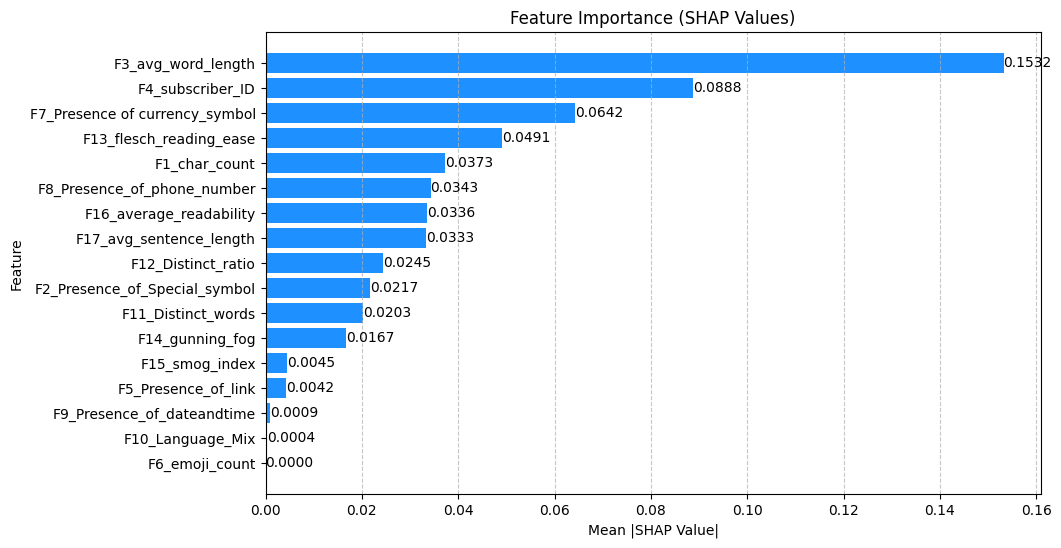

[ 6.35  3.7  26.11 15.13  0.71  0.   10.94  5.84  0.16  0.07  3.46  4.17
  8.36  2.84  0.77  5.73  5.68]


In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X = df.drop(columns=['label'])

# Select the target column as Y
Y = df['label']


feature_names = X.columns.tolist()  # List of feature names

print(feature_names)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Compute SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)  # For classification, select class 1 SHAP values

shap_reshaped = np.transpose(shap_values, (0, 2,1))

print(shap_reshaped.shape)

shap_mean = abs(shap_reshaped).mean(axis=(0, 1))

print(shap_mean)

shap_df = pd.DataFrame({"Feature": feature_names, "Mean SHAP Value": shap_mean})
shap_df = shap_df.sort_values(by="Mean SHAP Value", ascending=True)  # Sort for better visualization

# Plot SHAP bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(shap_df["Feature"], shap_df["Mean SHAP Value"], color="dodgerblue")
plt.xlabel("Mean |SHAP Value|")
plt.ylabel("Feature")
plt.title("Feature Importance (SHAP Values)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.4f}', va='center', ha='left', fontsize=10)
plt.savefig(data_raw + '.png', dpi=300, bbox_inches='tight')
plt.show()

plt.show()

total_sum = np.sum(shap_mean)

# Compute ratios
ratios = np.round((shap_mean / total_sum) * 100, 2)

# Print results
print(ratios)



In [ ]:
ratios = np.round((shap_mean / total_sum) * 100, 2)
print(ratios)

[ 6.35  3.7  26.11 15.13  0.71  0.   10.94  5.84  0.16  0.07  3.46  4.17
  8.36  2.84  0.77  5.73  5.68]


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier  # Example model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier  # Example model
import numpy as np
# Select all columns except the target as features (X)
X = df.drop(columns=['label'])

# Select the target column as Y
Y = df['label']

start = time.time()

# Initialize RandomForestClassifier
##rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Example model (Replace with your preferred model)
model = RandomForestClassifier()

# Lists to store metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Perform cross-validation
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Train model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy_list.append(accuracy_score(y_test, y_pred))
    precision_list.append(precision_score(y_test, y_pred, average='weighted'))  # 'weighted' for multi-class
    recall_list.append(recall_score(y_test, y_pred, average='weighted'))
    f1_list.append(f1_score(y_test, y_pred, average='weighted'))

classification_time = time.time()-start
print(classification_time)

# Print mean of each metric
print(f"Mean Accuracy: {np.mean(accuracy_list):.4f}")
print(f"Mean Precision: {np.mean(precision_list):.4f}")
print(f"Mean Recall: {np.mean(recall_list):.4f}")
print(f"Mean F1-score: {np.mean(f1_list):.4f}")
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

12.1440589427948
Mean Accuracy: 0.9049
Mean Precision: 0.9061
Mean Recall: 0.9049
Mean F1-score: 0.9049

🔹 Classification Report:
               precision    recall  f1-score   support

         ham       0.91      0.84      0.87        99
        spam       0.85      0.92      0.88       100

    accuracy                           0.88       199
   macro avg       0.88      0.88      0.88       199
weighted avg       0.88      0.88      0.88       199



In [ ]:
# Select all columns except the target as features (X)
X = df.drop(columns=['label'])

# Select the target column as Y
Y = df['label']


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

start = time.time()

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

target_names = ['ham', 'spam']

y_pred = rf_model.predict(X_test)

classification_time = time.time()-start
print(classification_time)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print Metrics
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1 Score: {f1:.4f}")
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

1.051375150680542
✅ Accuracy: 0.8875
✅ Precision: 0.8885
✅ Recall: 0.8875
✅ F1 Score: 0.8875

🔹 Classification Report:
               precision    recall  f1-score   support

         ham       0.87      0.91      0.89       193
        spam       0.91      0.87      0.89       207

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [ ]:
df.to_csv("feature.csv", index=False)
print(df.columns)

Index(['label', 'F1_char_count', 'F2_Presence_of_Special_symbol',
       'F3_avg_word_length', 'F4_subscriber_ID', 'F5_Presence_of_link',
       'F6_emoji_count', 'F7_Presence of currency_symbol',
       'F8_Presence_of_phone_number', 'F9_Presence_of_dateandtime',
       'F10_Language_Mix', 'F11_Distinct_words', 'F12_Distinct_ratio',
       'F13_flesch_reading_ease', 'F14_gunning_fog', 'F15_smog_index',
       'F16_average_readability', 'F17_avg_sentence_length'],
      dtype='object')


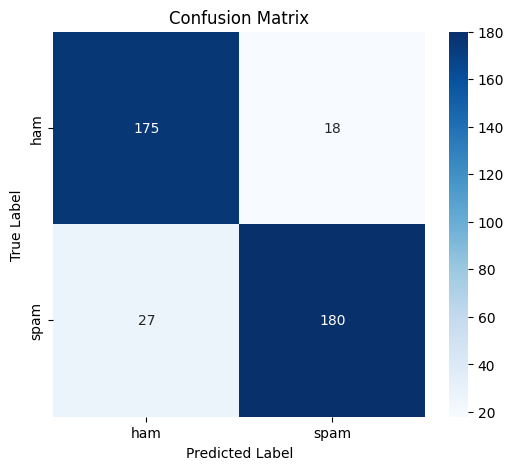

In [ ]:
# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix as Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
100%|██████████| 32/32 [00:04<00:00,  6.88it/s]

[LightGBM] [Info] Number of positive: 793, number of negative: 806
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000491 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1589
[LightGBM] [Info] Number of data points in the train set: 1599, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495935 -> initscore=-0.016261
[LightGBM] [Info] Start training from score -0.016261
                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
ExtraTreesClassifier               0.90               0.90    None      0.90   
LGBMClassifier                     0.89               0.89    None      0.89   
RandomForestClassifier             0.89               0.89    None      0.89   
KNeighborsClassifier               0.88               0.88    None      0.88   
BaggingClassifier              

In [ ]:
# Initialize model
start = time.time()
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Store accuracy and best features
accuracy_list = []
selected_features_list = []
n_features = list(range(1, X.shape[1] + 1))  # From 1 to total number of features

# RFE for different numbers of features
for n in n_features:
    rfe = RFE(model, n_features_to_select=n)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)

    # Train model
    model.fit(X_train_rfe, y_train)
    y_pred = model.predict(X_test_rfe)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracy_list.append(acc)

    # Store selected features
    selected_features = X.columns[rfe.get_support()].tolist()
    selected_features_list.append(selected_features)



selection_time = time.time()-start


In [ ]:
print(selection_time)

71.31020545959473


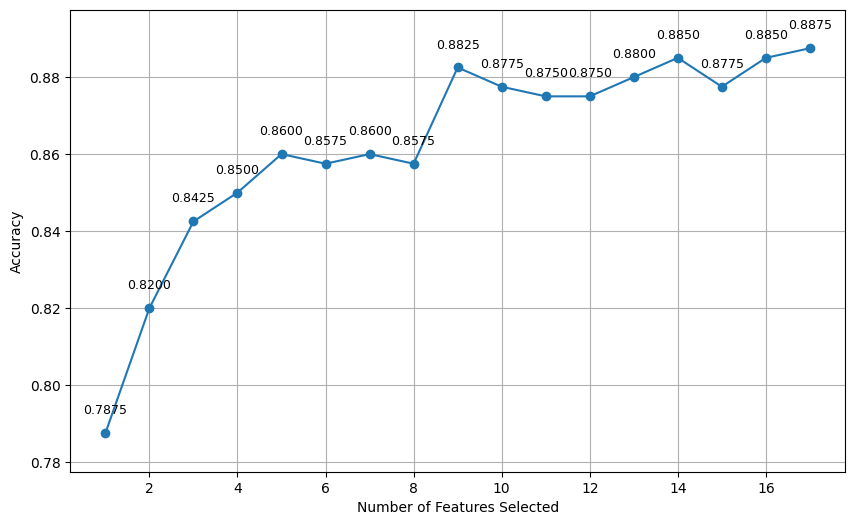

Best number of features: 17
Best accuracy: 0.8875
Best feature combination: ['F1_char_count', 'F2_Presence_of_Special_symbol', 'F3_avg_word_length', 'F4_subscriber_ID', 'F5_Presence_of_link', 'F6_emoji_count', 'F7_Presence of currency_symbol', 'F8_Presence_of_phone_number', 'F9_Presence_of_dateandtime', 'F10_Language_Mix', 'F11_Distinct_words', 'F12_Distinct_ratio', 'F13_flesch_reading_ease', 'F14_gunning_fog', 'F15_smog_index', 'F16_average_readability', 'F17_avg_sentence_length']


In [ ]:
# Plot accuracy vs number of features
plt.figure(figsize=(10, 6))
plt.plot(n_features, accuracy_list, marker='o')

# Annotate each point with accuracy
for i, acc in enumerate(accuracy_list):
    plt.text(
        n_features[i],
        acc + 0.005,  # Slightly above the point for better visibility
        f"{acc:.4f}",
        ha='center',
        fontsize=9,
        color='black'
    )

##plt.title('Accuracy vs. Number of Selected Features')
plt.xlabel('Number of Features Selected')
plt.ylabel('Accuracy')
plt.grid(True)
plt.ylim(min(accuracy_list) -0.01, max(accuracy_list) + 0.01)
plt.savefig(data_raw+'.png', dpi=500)
plt.show()

# Find the best accuracy and corresponding features
best_index = np.argmax(accuracy_list)
best_n = n_features[best_index]
best_accuracy = accuracy_list[best_index]
best_features = selected_features_list[best_index]

# Display the results
print(f"Best number of features: {best_n}")
print(f"Best accuracy: {best_accuracy:.4f}")
print(f"Best feature combination: {best_features}")

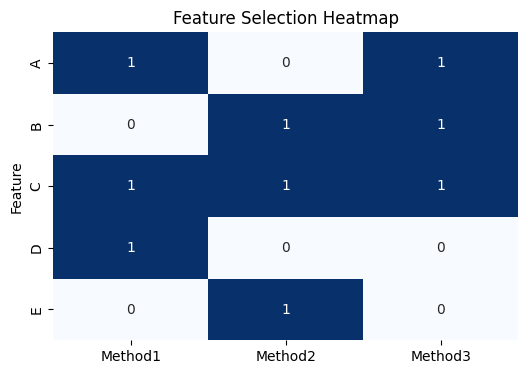

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Example Data
data = pd.DataFrame({
    'Feature': ['A', 'B', 'C', 'D', 'E'],
    'Method1': [1, 0, 1, 1, 0],
    'Method2': [0, 1, 1, 0, 1],
    'Method3': [1, 1, 1, 0, 0]
}).set_index('Feature')

plt.figure(figsize=(6, 4))
sns.heatmap(data, annot=True, cmap="Blues", cbar=False)
plt.title("Feature Selection Heatmap")
plt.show()


In [ ]:
!pip install upsetplot

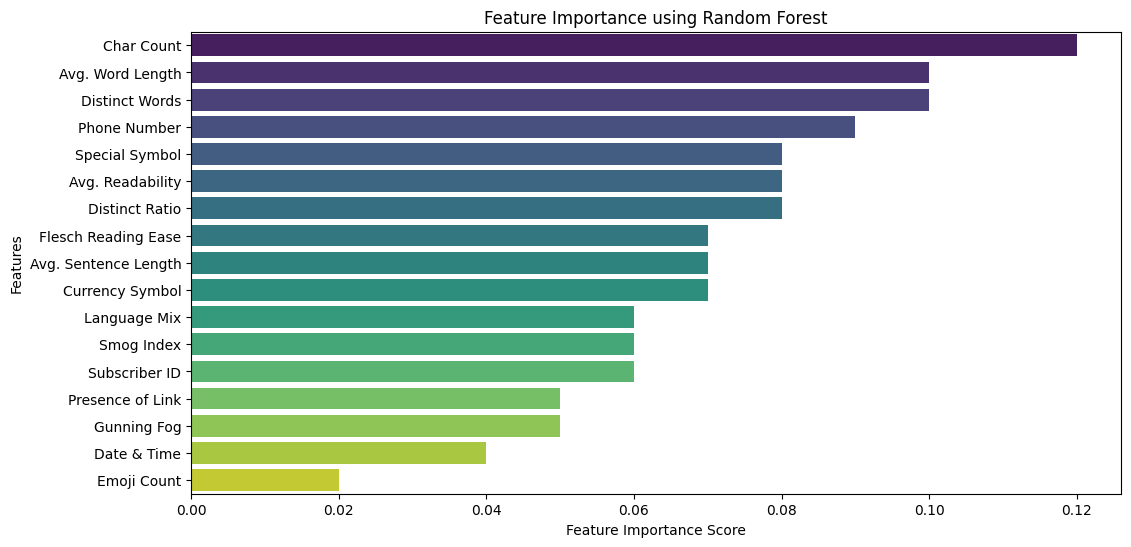

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Simulated feature names (Replace with actual feature names)
feature_names = [
    "Char Count", "Special Symbol", "Avg. Word Length", "Subscriber ID",
    "Presence of Link", "Emoji Count", "Currency Symbol", "Phone Number",
    "Date & Time", "Language Mix", "Distinct Words", "Distinct Ratio",
    "Flesch Reading Ease", "Gunning Fog", "Smog Index",
    "Avg. Readability", "Avg. Sentence Length"
]

# Simulated feature importance values (Replace with actual model output)
feature_importance = np.array([
    0.12, 0.08, 0.10, 0.06, 0.05, 0.02, 0.07, 0.09,
    0.04, 0.06, 0.10, 0.08, 0.07, 0.05, 0.06, 0.08, 0.07
])

# Create DataFrame for visualization
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette="viridis")

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance using Random Forest")
plt.show()
